---

# **Práctica 1**: Ocultar información en imágenes digitales



---

##**Inicio**

---


**Empezamos** importando las librerías necesarias, montando el drive y abriendo la imagen que vamos a utilizar en esta práctica (en niveles de gris y en color RGB): texto en cursiva

---

In [ ]:
# Importamos módulos y funcionalidades
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

# Montamos nuestro Drive
drive.mount("/content/drive", force_remount=True)

# Directorio de trabajo
dir = "/content/drive/MyDrive/Curso_24_25/imas/"

# Ruta de la imagen
path = dir + 'lena.bmp'

# Leer la imagen en color
img_BGR = cv2.imread(path, cv2.IMREAD_COLOR)

# Convertir a RGB
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

# Leer la imagen en niveles de gris
img_gris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Mostrar las dos imágenes
plt.subplot(121), plt.title("en niveles de gris"), plt.axis("off")
plt.imshow(img_gris, cmap = 'gray')
plt.subplot(122), plt.title("en color"), plt.axis("off")
plt.imshow(img_RGB, cmap = 'gray')
plt.show()

---
## **Enunciado**

- Esconder un mensaje privado (una cadena de caracteres) en una imagen digital en color (lena.bmp) intentando que dicho mensaje sea lo más largo posible (sin que se aprecie pérdida de calidad visual)

**Se pide**: Implementar y probar las siguientes funciones

---


In [ ]:
# Implementar una función tal que dada una imagen y un mensaje de texto
# se devuelva una imagen con el mensaje oculto pero
# no diferenciable visualmente de la original
def ocultar_mensaje(imagen, mensaje):
  pass

# Implementar una función tal que dada una imagen devuelva
# el mensaje oculto que contiene
def decodificar_mensaje(imagen):
  pass

# Utilizando estas funciones probar a codificar distintos mensajes
# de distintos tamños en la imagen y a decodificarlos


---

**Optativo**: quien quiera profundizar en el desarrollo de esta práctica (no es de entrega obligatoria), puede continuar el desarrollo del problema implementando un método RLE de compresión de diseño propio, codificando en dicho método la información de los 4 planos de bit más significativos (obviando el resto que se puede rellenar con valores aleatorios) y almacenando la imagen codificada en un fichero con formato propio

**Normas**: La práctica se puede entregar:

  (a) en un cuaderno en Python para Colab (extensión .ypynb) incluyendo una breve memor ia explicativa en el mismo cuaderno

  (b) en un fichero de código en Python (extensión .py) adjuntando un breve memoria explicativa en otro fichero en formato pdf



---

## Comentarios y ayudas


---
###**Contenido aleatorio en el último plano de bits**:

- Modificamos el contenido del último plano de bits con información aleatoria (0 o 1)

---

In [ ]:
# Crear una copia de la imagen
img_modified = img_gris.copy()

# Introducir información aleatoria en el último plano de bits
rows, cols = img_modified.shape
for i in range(rows):
  for j in range(cols):
    # Obtener el valor del píxel
    pixel = img_modified[i, j]

    # Cambiar el último bit del píxel de forma aleatoria
    if np.random.randint(2) == 1:
      img_modified[i, j] = pixel | 1       # 1 = 00000001
    else:
      img_modified[i, j] = pixel & 254   # 254 = 11111110

# Mostrar las dos imágenes
plt.subplot(121), plt.title("Imagen Original"), plt.axis("off")
plt.imshow(img_gris, cmap='gray')
plt.subplot(122), plt.title("Imagen Modificada"), plt.axis("off")
plt.imshow(img_modified, cmap='gray')
plt.show()


---
###**Contenido aleatorio en los 4 últimos planos de bits**:

- Modificamos el contenido de los 4 últimos planos de bits con información aleatoria (0 o 1)

---

In [ ]:
# Crear una copia de la imagen
img_modified = img_gris.copy()

# Introducir información aleatoria en los cuatro últimos planos de bits
rows, cols = img_modified.shape
for i in range(rows):
  for j in range(cols):
    # Obtener el valor del píxel
    pixel = img_modified[i, j]

    # Cambiar los cuatro últimos bits del píxel
    random_value = np.random.randint(16)  # Valor aleatorio entre 0 y 15 (entre 0000 y 1111)
    img_modified[i, j] = (pixel & 240) | random_value # 240 = 11110000

# Mostrar las dos imágenes
plt.subplot(121), plt.title("Imagen Original"), plt.axis("off")
plt.imshow(img_gris, cmap='gray')
plt.subplot(122), plt.title("Imagen Modificada"), plt.axis("off")
plt.imshow(img_modified, cmap='gray')
plt.show()


---
###**Contenido a cero en los 6 últimos planos de bits**:

- Modificamos el contenido de los 6 últimos planos de bits con valor 0 (últimos 6 bits a 0. Máscara = 11000000)

---


In [ ]:
# Crear una copia de la imagen
img_modified = img_gris.copy()

# Nos quedamos sólo con la info de los dos primeros bits (el resto a 0)
rows, cols = img_modified.shape
for i in range(rows):
  for j in range(cols):
    # Obtener el valor del píxel
    pixel = img_modified[i, j]

    # Cambiar los seis últimos bits del píxel a 0
    img_modified[i, j] = pixel & 192 # 192 = 128 + 64 = 11000000

# Mostrar las dos imágenes
plt.subplot(121), plt.title("Imagen Original"), plt.axis("off")
plt.imshow(img_gris, cmap='gray')
plt.subplot(122), plt.title("Imagen Modificada"), plt.axis("off")
plt.imshow(img_modified, cmap='gray')
plt.show()


---
###**Para imágenes en color**:



```
# Crear una copia de la imagen
img_modified = img_RGB.copy()

# Obtener información de filas, columnas y canales
rows, cols, channels = img_modified.shape

# Bucle
for i in range(rows):
  for j in range(cols):
    for k in range(channels):
      # Obtener el valor del píxel
      pixel = img_modified[i, j, k]
      ...
      ...
      img_modified[i, j, k] = ...

```


---


---

# **Práctica 2**: Resolver un sudoku contenido en una imagen digital



---

##**Inicio**

---


**Empezamos** abriendo la imagen que vamos a utilizar en esta práctica:

---


In [ ]:
# Directorio de trabajo
dir = "/content/drive/MyDrive/Curso_24_25/imas/"

# Ruta de la imagen
path = dir + 'sudoku.jpg'

# Leer la imagen en niveles de gris
img_gris = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen
cv2_imshow(img_gris)

---
## **Enunciado**

- Reconocimiento de la información de un sudoku a partir de la imagen "sudoku.jpg" en la que aparece el estado inicial del sudoku que se quiere resolver

**Se pide**: un programa en python que dada una imagen en la que aparezca un sudoku (puede ser sudoku.jpg o cualquier otra) nos devuelva una matriz de 9x9 con la información que hay en cada una de las casillas (de 1 a 9 si hay dígito y 0 si no hay nada)

**Nota**: dada la imagen sudoku.jpg el resultado sería:

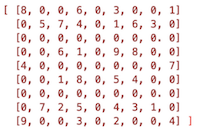

**Optativo**: quien quiera profundizar en el desarrollo de esta práctica (no es de entrega obligatoria), puede continuar el desarrollo del problema implementando un programa en Python que dada una imagen capturada con el móvil devuelva el resultado del sudoku (utilizando el método por backtrakking que se incluye en este cuaderno o cualquier otro que se eliga para su resolución)

**Nota**: para el reconocimiento de los dígitos presentes en el sudoku se puede emplear cualquier biblioteca de funciones en python que posibilite manejar un OCR

**Normas**: La práctica se puede entregar:

  (a) en un cuaderno en Python para Colab (extensión .ypynb) incluyendo una breve memor ia explicativa en el mismo cuaderno

  (b) en un fichero de código en Python (extensión .py) adjuntando un breve memoria explicativa en otro fichero en formato pdf


---

## Comentarios y ayudas


---
###**Resolución de sudokus por backtrakking**:

---

In [ ]:
# soluciones de sudokus por backtrakking

def solve_sudoku(board):
    empty = find_empty(board)
    if not empty:
        return True  # No quedan casillas vacías, el sudoku está resuelto.

    row, col = empty

    for num in range(1, 10):
        if is_valid(board, num, (row, col)):
            board[row][col] = num

            if solve_sudoku(board):
                return True

            board[row][col] = 0  # Si no se encuentra una solución, restablecer la casilla.

    return False

def find_empty(board):
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 0:
                return (i, j)
    return None

def is_valid(board, num, pos):
    # Verificar la fila
    for i in range(len(board[0])):
        if board[pos[0]][i] == num and pos[1] != i:
            return False

    # Verificar la columna
    for i in range(len(board)):
        if board[i][pos[1]] == num and pos[0] != i:
            return False

    # Verificar el cuadro de 3x3
    box_x = pos[1] // 3
    box_y = pos[0] // 3
    for i in range(box_y * 3, box_y * 3 + 3):
        for j in range(box_x * 3, box_x * 3 + 3):
            if board[i][j] == num and (i, j) != pos:
                return False

    return True

def print_board(board):
    for i in range(len(board)):
        if i % 3 == 0 and i != 0:
            print("- - - - - - - - - - - -")
        for j in range(len(board[i])):
            if j % 3 == 0 and j != 0:
                print(" | ", end="")
            if j == 8:
                print(board[i][j])
            else:
                print(str(board[i][j]) + " ", end="")

# Ejemplo de uso:
sudoku_board = [
    [8, 0, 0, 6, 0, 3, 0, 0, 1],
    [0, 5, 7, 4, 0, 1, 6, 3, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 6, 1, 0, 9, 8, 0, 0],
    [4, 0, 0, 0, 0, 0, 0, 0, 7],
    [0, 0, 1, 8, 0, 5, 4, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 7, 2, 5, 0, 4, 3, 1, 0],
    [9, 0, 0, 3, 0, 2, 0, 0, 4]
]

print("Tablero Original:")
print_board(sudoku_board)
solve_sudoku(sudoku_board)
print("\nTablero Resuelto:")
print_board(sudoku_board)
